In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import seaborn as sbn
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [2]:
df_main = pd.read_csv('20181207_DataForRegression.csv')
df_main.head()

,NewConn,NewConnRatio,LiveConn,LiveConnRatio,Replacement,Saturday,Maintenance,EntryGain,F,N,...,StationImp,Signal,Structural,Electrical,ConnectionDay,Broken,Shuttle,OriginalConnection,StdRatio,Score
0,3,0.500000,8,1.333333,1,True,1,1,True,False,...,False,True,False,False,9,1,0,6,0.090351,0.049564
1,0,0.000000,6,1.000000,0,True,1,0,True,False,...,False,False,False,False,6,0,0,6,0.082633,0.154406
2,1,0.166667,6,1.000000,1,True,1,1,True,False,...,False,True,False,False,7,1,0,6,0.086103,0.551646
3,1,0.166667,6,1.000000,1,True,1,1,True,False,...,False,True,False,False,7,1,0,6,0.046067,-0.280808
4,1,0.166667,6,1.000000,1,True,1,1,True,False,...,False,True,False,False,7,1,0,6,0.046173,0.218957


In [3]:
df_main = df_main.apply(lambda x: x.astype(float), axis=0)
#df_main['Score'] = 1/(1+np.exp(-0.05*df_main['Score']+abs(df_main['Score'].min())))
df_main.head()

,NewConn,NewConnRatio,LiveConn,LiveConnRatio,Replacement,Saturday,Maintenance,EntryGain,F,N,...,StationImp,Signal,Structural,Electrical,ConnectionDay,Broken,Shuttle,OriginalConnection,StdRatio,Score
0,3.0,0.500000,8.0,1.333333,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,9.0,1.0,0.0,6.0,0.090351,0.049564
1,0.0,0.000000,6.0,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,6.0,0.082633,0.154406
2,1.0,0.166667,6.0,1.000000,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,7.0,1.0,0.0,6.0,0.086103,0.551646
3,1.0,0.166667,6.0,1.000000,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,7.0,1.0,0.0,6.0,0.046067,-0.280808
4,1.0,0.166667,6.0,1.000000,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,7.0,1.0,0.0,6.0,0.046173,0.218957


In [3]:
df_main.shape

(1225, 22)

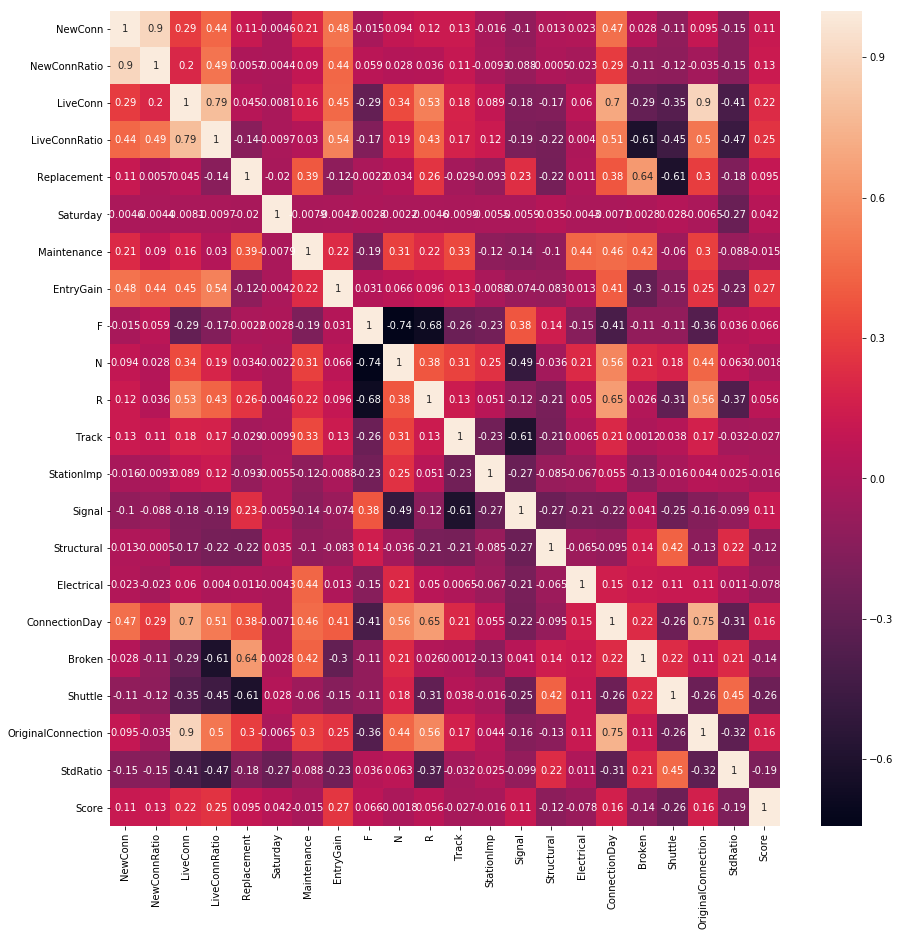

In [4]:
plt.figure(figsize=(15,15))
sbn.heatmap(df_main.corr(), annot=True)

In [12]:
scale_columns = ['NewConn', 'NewConnRatio', 'LiveConn', 'LiveConnRatio', 'Replacement',
                 'Maintenance','EntryGain','ConnectionDay','Broken','Shuttle','OriginalConnection','StdRatio']
predictors = list(df_main.columns)
predictors.remove('Score')
#predictors.remove('Score1')
output = ['Score']
X_train, X_test, y_train, y_test = train_test_split(df_main[predictors], df_main[output], test_size=0.33, random_state=42)

In [14]:
df_main['Score'] = df_main['Score'] - 

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.04956367  0.15440624  0.55164592 ..., -0.70116163 -0.00948243
 -1.22836836].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

mod_linear = LinearRegression()
mod_linear.fit(X_train, y_train)
ypred = mod_linear.predict(X_test)
print(r2_score(y_test, ypred))
plt.plot(y_test, ypred,'.')
plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_test),np.max(y_test)], 'r-')

0.898148273547
0.404828766875


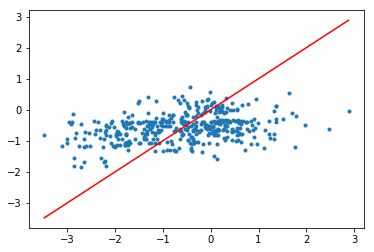

In [11]:
# Random forest
scaler = StandardScaler()
X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
mod_rf1 =  RandomForestRegressor(n_estimators = 200 , oob_score = True, random_state = 42)
mod_rf1.fit(X_train,y_train)
ypredTr = mod_rf1.predict(X_train)
X_test[scale_columns] = scaler.transform(X_test[scale_columns])
ypredTs = mod_rf1.predict(X_test)
print(r2_score(y_train, ypredTr))
print(r2_score(y_test, ypredTs))
plt.plot(y_test, ypred,'.')
plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_test),np.max(y_test)], 'r-')

In [123]:
nestimators = [10,20,50,100,200]

for nes in nestimators :
    IS=[]
    OS=[]
    for i in range(1,20):
        X_train, X_test, y_train, y_test = train_test_split(df_main[predictors], df_main[output], test_size=0.33, random_state=i*10)
        mod_rf = RandomForestRegressor(n_estimators = nes, oob_score = True, n_jobs = -1,random_state =50, \
                                       max_features = "auto", min_samples_leaf = 2)
        X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
        X_test[scale_columns] = scaler.transform(X_test[scale_columns])
        mod_rf.fit(X_train, y_train)
        ypredTr = mod_rf.predict(X_train)
        ypredTs = mod_rf.predict(X_test)
        
        IS.append(r2_score(y_train, ypredTr))
        OS.append(r2_score(y_test, ypredTs))
        
    print("N_Estimator: ", nes, "IS :", np.mean(IS))
    print("N_Estimator: ", nes, "OS :", np.mean(OS))
        #plt.plot(y_test, ypred,'.')
        #plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_test),np.max(y_test)], 'r-')
#print("Best min_sample_leaf:", 2 )

N_Estimator:  10 IS : 0.762364754565
N_Estimator:  10 OS : 0.322340977757
N_Estimator:  20 IS : 0.779338297019
N_Estimator:  20 OS : 0.344765477447
N_Estimator:  50 IS : 0.788676938807
N_Estimator:  50 OS : 0.357339199577
N_Estimator:  100 IS : 0.793344030462
N_Estimator:  100 OS : 0.361708347799
N_Estimator:  200 IS : 0.794925925676
N_Estimator:  200 OS : 0.365084703116


In [28]:
maxDepth = [12,15,17,19,21, None]

for mD in maxDepth :
    IS=[]
    OS=[]
    for i in range(1,20):
        X_train, X_test, y_train, y_test = train_test_split(df_main[predictors], df_main[output], test_size=0.33, random_state=i*10)
        mod_rf = RandomForestRegressor(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50, \
                                       max_features = "auto", min_samples_leaf = 2, max_depth = mD)
        X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
        X_test[scale_columns] = scaler.transform(X_test[scale_columns])
        mod_rf.fit(X_train, y_train)
        ypredTr = mod_rf.predict(X_train)
        ypredTs = mod_rf.predict(X_test)
        
        IS.append(r2_score(y_train, ypredTr))
        OS.append(r2_score(y_test, ypredTs))
        
    print("MaxDepth: ", mD, "IS :", np.mean(IS))
    print("MaxDepth: ", mD, "OS :", np.mean(OS))
        #plt.plot(y_test, ypred,'.')
        #plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_test),np.max(y_test)], 'r-')
#print("Best min_sample_leaf:", 2 )

MaxDepth:  12 IS : 0.760493987074
MaxDepth:  12 OS : 0.371401032056
MaxDepth:  15 IS : 0.78761315581
MaxDepth:  15 OS : 0.367730730859
MaxDepth:  17 IS : 0.792489692667
MaxDepth:  17 OS : 0.366242593185
MaxDepth:  19 IS : 0.794143019841
MaxDepth:  19 OS : 0.365600372874
MaxDepth:  21 IS : 0.794705345034
MaxDepth:  21 OS : 0.365308003729
MaxDepth:  None IS : 0.794925925676
MaxDepth:  None OS : 0.365084703116


In [124]:
sample_leaf_options = [1,2,3,4,5,10,20,50]

for leaf_size in sample_leaf_options :
    IS=[]
    OS=[]
    for i in range(1,20):
        X_train, X_test, y_train, y_test = train_test_split(df_main[predictors], df_main[output], test_size=0.33, random_state=i*10)
        mod_rf = RandomForestRegressor(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50, \
                                       max_features = "auto", min_samples_leaf = 1, max_depth =12)
        X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
        X_test[scale_columns] = scaler.transform(X_test[scale_columns])
        mod_rf.fit(X_train, y_train)
        ypredTr = mod_rf.predict(X_train)
        ypredTs = mod_rf.predict(X_test)
        
        IS.append(r2_score(y_train, ypredTr))
        OS.append(r2_score(y_test, ypredTs))
        
    print("Leaf: ", leaf_size, "IS :", np.mean(IS))
    print("Leaf: ", leaf_size, "OS :", np.mean(OS))
        #plt.plot(y_test, ypred,'.')
        #plt.plot([np.min(y_test),np.max(y_test)],[np.min(y_test),np.max(y_test)], 'r-')
print("Best min_sample_leaf:", 1 )

Leaf:  1 IS : 0.844673716914
Leaf:  1 OS : 0.373632888549
Leaf:  2 IS : 0.844673716914
Leaf:  2 OS : 0.373632888549
Leaf:  3 IS : 0.844673716914
Leaf:  3 OS : 0.373632888549
Leaf:  4 IS : 0.844673716914
Leaf:  4 OS : 0.373632888549
Leaf:  5 IS : 0.844673716914
Leaf:  5 OS : 0.373632888549
Leaf:  10 IS : 0.844673716914
Leaf:  10 OS : 0.373632888549
Leaf:  20 IS : 0.844673716914
Leaf:  20 OS : 0.373632888549
Leaf:  50 IS : 0.844673716914
Leaf:  50 OS : 0.373632888549
Best min_sample_leaf: 1


In [ ]:
from sklaern

In [68]:
def modelOutput()


for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(df_main[predictors], df_main[output], test_size=0.33, random_state=i*10)
    mod_rf = RandomForestRegressor(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50,
                                   max_features = "auto", min_samples_leaf = 1, max_depth =12)
    X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
    X_test[scale_columns] = scaler.transform(X_test[scale_columns])
    mod_rf.fit(X_train, y_train)
    ypredTr = mod_rf.predict(X_train)
    ypredTs = mod_rf.predict(X_test)
        
    IS.append(r2_score(y_train, ypredTr))
    OS.append(r2_score(y_test, ypredTs))
        
print("Leaf: ", leaf_size, "IS :", np.mean(IS))
print("Leaf: ", leaf_size, "OS :", np.mean(OS))

Leaf:  3 IS : 0.837091287027
Leaf:  3 OS : 0.356407893473


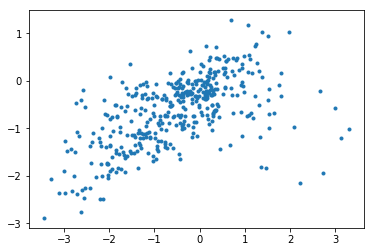

In [74]:
plt.plot(y_test, ypredTs,'.')

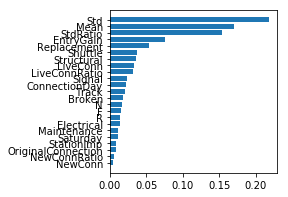

In [75]:
values, names = zip(*sorted(zip(mod_rf.feature_importances_, X_train.columns)))

import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(3,3))
pyplot.barh(range(len(names)), values, align='center')
pyplot.yticks(range(len(names)), names);

In [33]:
names

('Electrical',
 'StationImp',
 'Structural',
 'Maintenance',
 'NewConnRatio',
 'NewConn',
 'OriginalConnection',
 'Saturday',
 'F',
 'R',
 'Track',
 'LiveConnRatio',
 'LiveConn',
 'Broken',
 'ConnectionDay',
 'N',
 'Signal',
 'Replacement',
 'Shuttle',
 'StdRatio',
 'EntryGain')

In [31]:
pd.dataFrame(mod_rf.feature_importances_

array([  1.46597641e-04,   1.10681490e-04,   1.68317366e-02,
         1.28522871e-02,   9.67302339e-02,   4.38239174e-03,
         1.04230413e-04,   3.21990272e-01,   6.30895085e-03,
         2.64540141e-02,   8.96064390e-03,   1.26914039e-02,
         0.00000000e+00,   7.17856120e-02,   0.00000000e+00,
         0.00000000e+00,   2.59106672e-02,   1.70765543e-02,
         1.17976284e-01,   4.47346499e-04,   2.59240093e-01])

In [ ]:
def plothist(array, xlabel, ylabel, title):
    list_allMeans= array
    # Initiate figure and axes 
    fig, ax = plt.subplots()
    # the histogram of the data
    n, bins, patches = ax.hist(np.array(list_allMeans), 30, density=1)
    # Add the gaussian curve
    y = ((1 / (np.sqrt(2 * np.pi) * np.std(list_allMeans)))* np.exp(-0.5 * (1 / np.std(list_allMeans) * (bins - np.mean(list_allMeans)))**2))
    ax.plot(bins, y, '-')

    # Add caption for x and y axis
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()


In [ ]:
plt.hist(df_main['Score'], bins=30)

In [ ]:
plothist(1/(1+np.exp(-0.01*df_main['Score']+abs(df_main['Score'].min()))),'a','b','c')

In [ ]:
plothist(np.log(df_main['Score']+abs(df_main['Score'].min())+1)/np.log(2),'a','b','c')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit((np.log(df_main['Score']+abs(df_main['Score'].min())+1)/np.log(2)))
scaler.transform((np.log(df_main['Score']+abs(df_main['Score'].min())+1)/np.log(2)))